In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_name = "data" + os.path.sep + "Canada_clean.csv"
df_can = pd.read_csv(file_name)

# Set the Country column to be the index
df_can = df_can.set_index('Country')

# Show the result
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
# Group the data by continent and sum-up

df_cont = df_can.groupby('Continent', axis = 0).sum()
display(df_cont)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


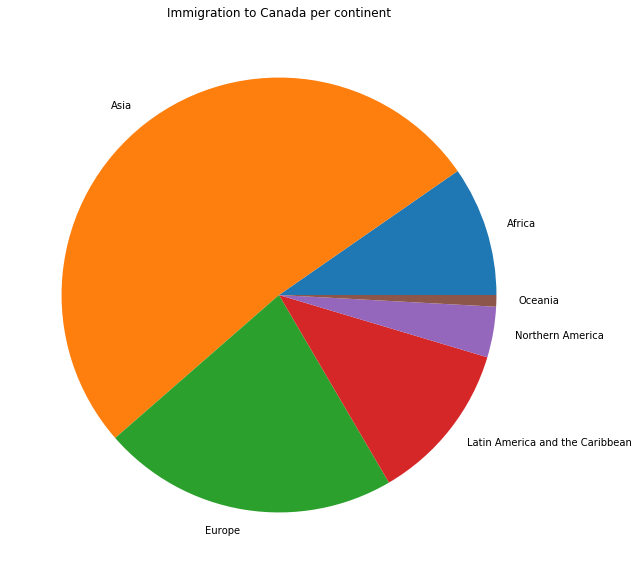

In [11]:
# Create a Pie plot
ax = df_cont['Total'].plot(kind = 'pie',
                          figsize = (20,10))

ax.set_title('Immigration to Canada per continent')
ax.set_ylabel("")
plt.show()

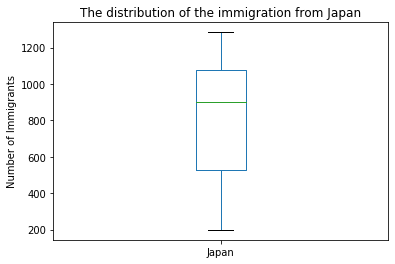

In [14]:
# Create the range of the years
years = list(map(str, range(1980,2014)))

df_japan = df_can.loc['Japan', years].transpose()

ax = df_japan.plot(kind = 'box')

ax.set_title('The distribution of the immigration from Japan')
ax.set_ylabel('Number of Immigrants')

plt.show()

In [35]:
# Compute the total number of immigrant per year
df_total  = df_can[years].transpose()

# Store the country names
countries = df_total.columns

# Compute the total per year
df_total['Total'] = df_total.sum(axis = 1)

# Drop the country columns
df_total = df_total.drop(countries, axis = 1)

# Rename the year column
df_total.rename(columns = {"Total":"total"}, inplace = True)
df_total.index.name = 'year'
df_total.columns.name = ''

# Convert the index into a column
df_total.reset_index(inplace = True) 

df_total.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


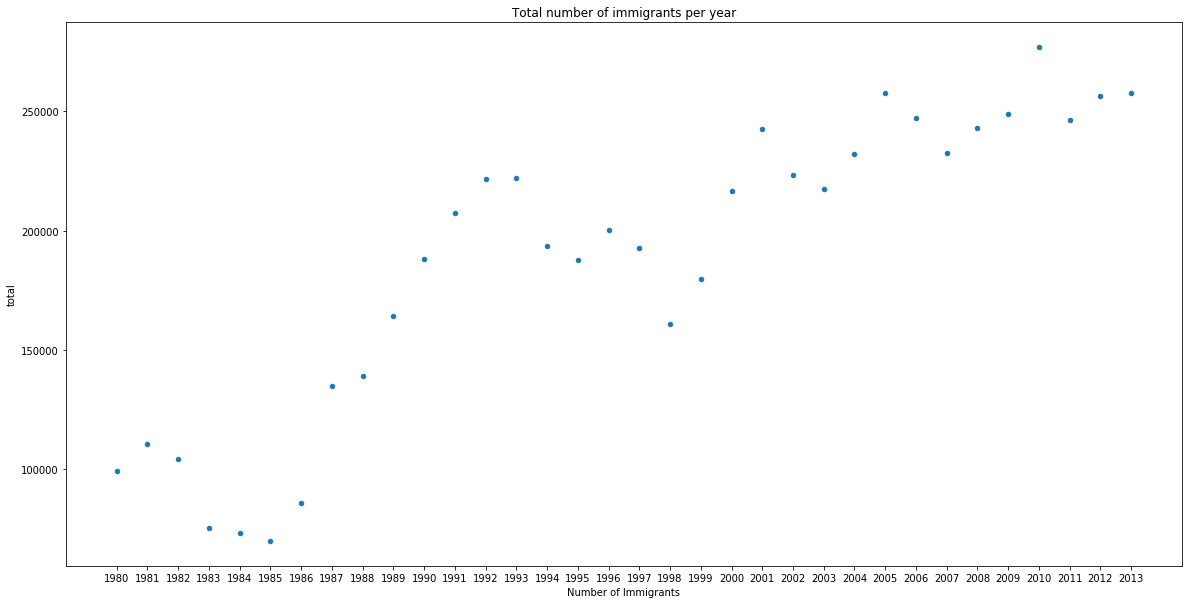

In [37]:
# Create a Scatter plot for the data
ax = df_total.plot(kind = "scatter",
                   x = "year",
                   y = "total",
                   figsize = (20,10))

ax.set_title('Total number of immigrants per year')
ax.set_xlabel('Year')
ax.set_xlabel('Number of Immigrants')

plt.show()